## Busines Problem Understanding
Masyarakat pada umumnya saat menjual atau membeli mobil bekas seringkali kebingungan untuk menentukan harga jual atau harga beli wajar, kesempatan ini digunakan oleh oknum pedagang mobil bekas untuk menaikkan harga mobil dengan tidak wajar. 

**GOAL**

Oleh karena itu disini saya inin membuat model prediksi untuktuk memperdiksi harga jual/harga beli mobil bekas agar masyarakat bisa memiliki gambaran sebelum membeli atau menjual produk mereka sehingga terhindar dari oknum penjual yang tidak jujur.

**MATRICS EVALUATION**

Matrics evaluation yang digunakan dalam pembuatan machine learning ini yaitu MAE(Mean Absolute Error) yang dimana MAE adalah rata-rata selisih harga nilai yang di perediksi dengan nilai sebenarnya

**TARGET**=Price 



## DATA PREPARATION
* Identifikasi Masalah
1. Cek missing value
2. Cek dupicate data
3. Cek tipe data
4. Cek distribusi data
5. Cek outlier
6. Cek Colinearity

* Lakukan penanganan terhadap masalah yang ditemukan
* lakukan Feature Engineering






### LOAD DATASET CAR PRICE

Dataset ini berisi harga mobil bekas dari berbagai merk. Dataset ini diambil dari Kaggle

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv('../Data/CarPrice_Assignment.csv')
display(df.info(),df.head(),df[df.duplicated()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### Hasil pengecekan dataset

* Datset terdiri dari 205 baris 
* Dataset tidak ada yang nan
* Dataset tidak ada yang duplicate

In [67]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

,Name,Type,N/A (%),Unique,Sample
0,car_ID,int64,0.0,205,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,symboling,int64,0.0,6,"[3, 1, 2, 0, -1, -2]"
2,CarName,object,0.0,147,"[alfa-romero giulia, alfa-romero stelvio, alfa-romero Quadrifoglio, audi 100 ls, audi 100ls, audi fox, audi 5000, audi 4000, audi 5000s (diesel), bmw 320i, bmw x1, bmw x3, bmw z4, bmw x4, bmw x5, chevrolet impala, chevrolet monte carlo, chevrolet vega 2300, dodge rampage, dodge challenger se, dodge d200, dodge monaco (sw), dodge colt hardtop, dodge colt (sw), dodge coronet custom, dodge dart custom, dodge coronet custom (sw), honda civic, honda civic cvcc, honda accord cvcc, honda accord lx, honda civic 1500 gl, honda accord, honda civic 1300, honda prelude, honda civic (auto), isuzu MU-X, isuzu D-Max , isuzu D-Max V-Cross, jaguar xj, jaguar xf, jaguar xk, maxda rx3, maxda glc deluxe, mazda rx2 coupe, mazda rx-4, mazda glc deluxe, mazda 626, mazda glc, mazda rx-7 gs, mazda glc 4, mazda glc custom l, mazda glc custom, buick electra 225 custom, buick century luxus (sw), buick century, buick skyhawk, buick opel isuzu deluxe, buick skylark, buick century special, buick regal sport coupe (turbo), mercury cougar, mitsubishi mirage, mitsubishi lancer, mitsubishi outlander, mitsubishi g4, mitsubishi mirage g4, mitsubishi montero, mitsubishi pajero, Nissan versa, nissan gt-r, nissan rogue, nissan latio, nissan titan, nissan leaf, nissan juke, nissan note, nissan clipper, nissan nv200, nissan dayz, nissan fuga, nissan otti, nissan teana, nissan kicks, peugeot 504, peugeot 304, peugeot 504 (sw), peugeot 604sl, peugeot 505s turbo diesel, plymouth fury iii, plymouth cricket, plymouth satellite custom (sw), plymouth fury gran sedan, plymouth valiant, plymouth duster, porsche macan, porcshce panamera, porsche cayenne, porsche boxter, renault 12tl, ...]"
3,fueltype,object,0.0,2,"[gas, diesel]"
4,aspiration,object,0.0,2,"[std, turbo]"
5,doornumber,object,0.0,2,"[two, four]"
6,carbody,object,0.0,5,"[convertible, hatchback, sedan, wagon, hardtop]"
7,drivewheel,object,0.0,3,"[rwd, fwd, 4wd]"
8,enginelocation,object,0.0,2,"[front, rear]"
9,wheelbase,float64,0.0,53,"[88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 103.5, 110.0, 88.4, 93.7, 103.3, 95.9, 86.6, 96.5, 94.3, 96.0, 113.0, 102.0, 93.1, 95.3, 98.8, 104.9, 106.7, 115.6, 96.6, 120.9, 112.0, 102.7, 93.0, 96.3, 95.1, 97.2, 100.4, 91.3, 99.2, 107.9, 114.2, 108.0, 89.5, 98.4, 96.1, 99.1, 93.3, 97.0, 96.9, 95.7, 102.4, 102.9, 104.5, 97.3, 104.3, 109.1]"


#### Mengubah tipe data dari Str ke int 
* Mengubah data doornumber dan cylinder number dari object ke integer


In [68]:
df.replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8},inplace=True)


### Cek Distribusi Data


array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'doornumber'}>,
        <Axes: title={'center': 'wheelbase'}>],
       [<Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>],
       [<Axes: title={'center': 'cylindernumber'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>],
       [<Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

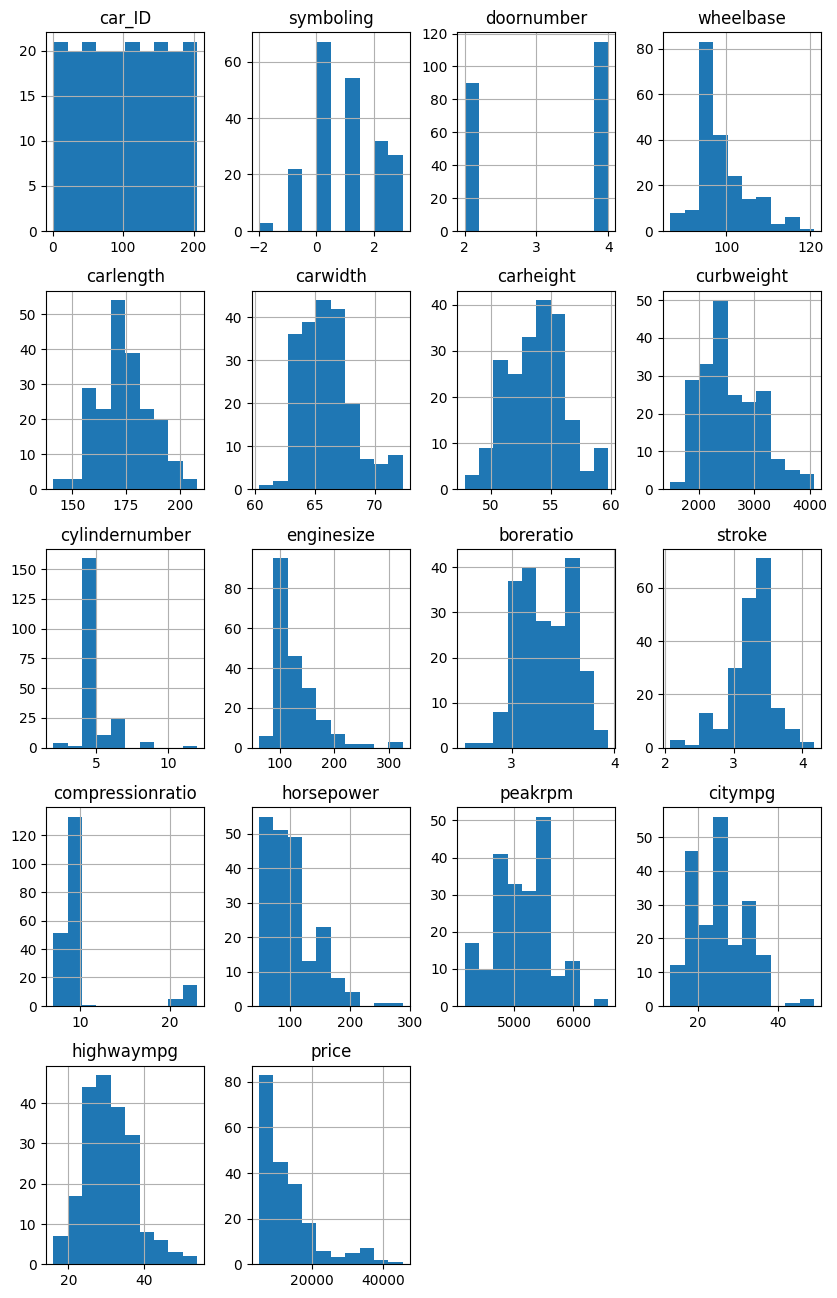

In [69]:
df.hist(figsize=(10,16))

In [70]:
df_number=df.select_dtypes(include='number')

In [71]:
from scipy.stats import shapiro

dist = []

for i in range(1, len(df_number.columns)):
    column_names = df_number.columns[i]
    stat, p_value = shapiro(df_number[column_names])
    
    if p_value > 0.05:
        distribution = "True"
    else:
        distribution = "False"
    
    dist.append([column_names, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Columns', 'Statistic', 'P-value', 'Normal Distribution'])
dist_df

,Columns,Statistic,P-value,Normal Distribution
0,symboling,0.917017,2.519247e-09,False
1,doornumber,0.631008,8.210937e-21,False
2,wheelbase,0.911586,1.036814e-09,False
3,carlength,0.982095,1.036083e-02,False
4,carwidth,0.921078,5.012857e-09,False
5,carheight,0.984231,2.167492e-02,False
6,curbweight,0.953042,2.891611e-06,False
7,cylindernumber,0.558368,1.547291e-22,False
8,enginesize,0.829439,3.056915e-14,False
9,boreratio,0.967185,1.042071e-04,False


##### Hasil Cek ditribusi 
dari hasil pengecekan distribusi menggunakan histogram dan shapiro tidak ada data yang berdistribusi normal

<Axes: >

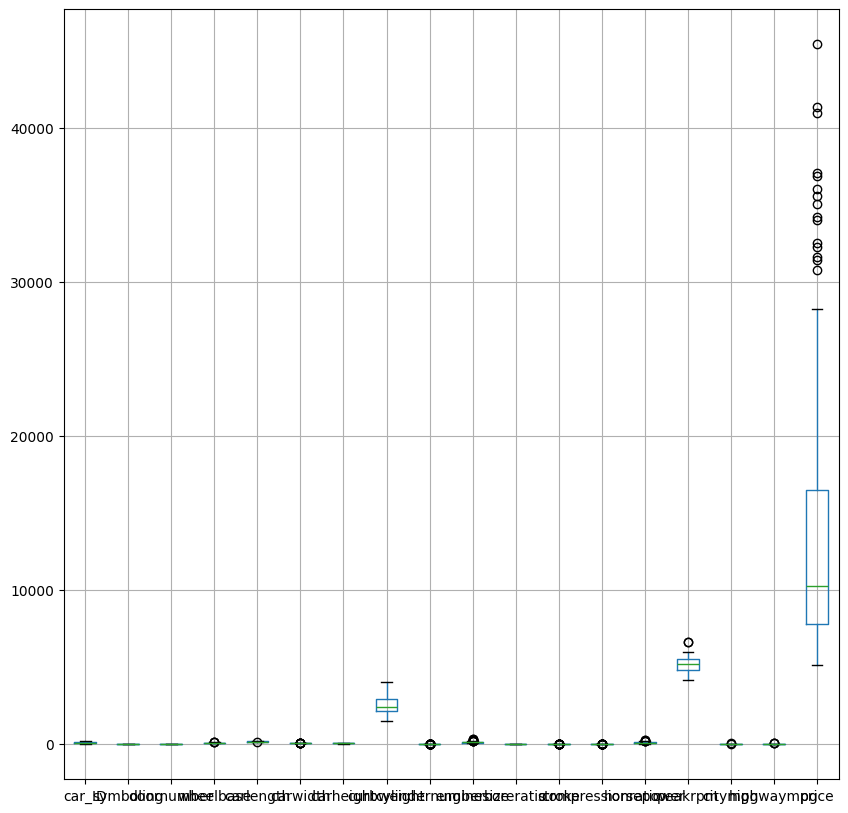

In [72]:
df.boxplot(figsize=(10,10))

In [73]:
data=[]
for nama in df_number:
    Q3=df_number.quantile(0.75)
    Q1=df_number.quantile(0.25)
    IQR=Q3-Q1

    batas_atas=Q3 + 1.5*IQR
    batas_bawah= Q1 - 1.5*IQR
    data.append([nama,batas_atas,batas_bawah])

data_n=pd.DataFrame(data,columns=['nama','batas_atas','batas_bawah'])
data_n

   


,nama,batas_atas,batas_bawah
0,car_ID,car_ID 307.000 symboling 5.000 doornumber 7.000 wheelbase 114.250 carlength 208.300 carwidth 71.100 carheight 60.750 curbweight 4120.000 cylindernumber 4.000 enginesize 207.000 boreratio 4.225 stroke 3.860 compressionratio 10.600 horsepower 185.000 peakrpm 6550.000 citympg 46.500 highwaympg 47.500 price 29575.500 dtype: float64,car_ID -101.000 symboling -3.000 doornumber -1.000 wheelbase 82.650 carlength 141.100 carwidth 59.900 carheight 46.750 curbweight 960.000 cylindernumber 4.000 enginesize 31.000 boreratio 2.505 stroke 2.660 compressionratio 7.400 horsepower 1.000 peakrpm 3750.000 citympg 2.500 highwaympg 11.500 price -5284.500 dtype: float64
1,symboling,car_ID 307.000 symboling 5.000 doornumber 7.000 wheelbase 114.250 carlength 208.300 carwidth 71.100 carheight 60.750 curbweight 4120.000 cylindernumber 4.000 enginesize 207.000 boreratio 4.225 stroke 3.860 compressionratio 10.600 horsepower 185.000 peakrpm 6550.000 citympg 46.500 highwaympg 47.500 price 29575.500 dtype: float64,car_ID -101.000 symboling -3.000 doornumber -1.000 wheelbase 82.650 carlength 141.100 carwidth 59.900 carheight 46.750 curbweight 960.000 cylindernumber 4.000 enginesize 31.000 boreratio 2.505 stroke 2.660 compressionratio 7.400 horsepower 1.000 peakrpm 3750.000 citympg 2.500 highwaympg 11.500 price -5284.500 dtype: float64
2,doornumber,car_ID 307.000 symboling 5.000 doornumber 7.000 wheelbase 114.250 carlength 208.300 carwidth 71.100 carheight 60.750 curbweight 4120.000 cylindernumber 4.000 enginesize 207.000 boreratio 4.225 stroke 3.860 compressionratio 10.600 horsepower 185.000 peakrpm 6550.000 citympg 46.500 highwaympg 47.500 price 29575.500 dtype: float64,car_ID -101.000 symboling -3.000 doornumber -1.000 wheelbase 82.650 carlength 141.100 carwidth 59.900 carheight 46.750 curbweight 960.000 cylindernumber 4.000 enginesize 31.000 boreratio 2.505 stroke 2.660 compressionratio 7.400 horsepower 1.000 peakrpm 3750.000 citympg 2.500 highwaympg 11.500 price -5284.500 dtype: float64
3,wheelbase,car_ID 307.000 symboling 5.000 doornumber 7.000 wheelbase 114.250 carlength 208.300 carwidth 71.100 carheight 60.750 curbweight 4120.000 cylindernumber 4.000 enginesize 207.000 boreratio 4.225 stroke 3.860 compressionratio 10.600 horsepower 185.000 peakrpm 6550.000 citympg 46.500 highwaympg 47.500 price 29575.500 dtype: float64,car_ID -101.000 symboling -3.000 doornumber -1.000 wheelbase 82.650 carlength 141.100 carwidth 59.900 carheight 46.750 curbweight 960.000 cylindernumber 4.000 enginesize 31.000 boreratio 2.505 stroke 2.660 compressionratio 7.400 horsepower 1.000 peakrpm 3750.000 citympg 2.500 highwaympg 11.500 price -5284.500 dtype: float64
4,carlength,car_ID 307.000 symboling 5.000 doornumber 7.000 wheelbase 114.250 carlength 208.300 carwidth 71.100 carheight 60.750 curbweight 4120.000 cylindernumber 4.000 enginesize 207.000 boreratio 4.225 stroke 3.860 compressionratio 10.600 horsepower 185.000 peakrpm 6550.000 citympg 46.500 highwaympg 47.500 price 29575.500 dtype: float64,car_ID -101.000 symboling -3.000 doornumber -1.000 wheelbase 82.650 carlength 141.100 carwidth 59.900 carheight 46.750 curbweight 960.000 cylindernumber 4.000 enginesize 31.000 boreratio 2.505 stroke 2.660 compressionratio 7.400 horsepower 1.000 peakrpm 3750.000 citympg 2.500 highwaympg 11.500 price -5284.500 dtype: float64
5,carwidth,car_ID 307.000 symboling 5.000 doornumber 7.000 wheelbase 114.250 carlength 208.300 carwidth 71.100 carheight 60.750 curbweight 4120.000 cylindernumber 4.000 enginesize 207.000 boreratio 4.225 stroke 3.860 compressionratio 10.600 horsepower 185.000 peakrpm 6550.000 citympg 46.500 highwaympg 47.500 price 29575.500 dtype: float64,car_ID -101.000 symboling -3.000 doornumber -1.000 wheelbase 82.650 carlength 141.100 carwidth 59.900 carheight 46.750 curbweight 960.000 cylindernumber 4.000 enginesize 31.000 boreratio 2.505 stroke 2.660 compressionratio 7.400 horsepower 1.000 peakrpm 3750.000 citympg 2.500 highwaympg 11.5

### KORELASI
melihat korelasi antar feature dan feature terhadap target untuk melihat kolinearity antar feature

In [74]:
df.corr('spearman',numeric_only=True).style.background_gradient(cmap='Blues')

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.156530,0.190352,0.196713,0.155379,0.149214,0.263124,0.124474,-0.118538,0.089132,0.272795,-0.159645,0.151079,0.005285,-0.229643,0.055784,0.021187,0.020485
symboling,-0.156530,1.000000,-0.679462,-0.537958,-0.396365,-0.253528,-0.523124,-0.256490,-0.143004,-0.176542,-0.169593,-0.018651,0.023008,-0.009954,0.282124,-0.018317,0.053316,-0.144684
doornumber,0.190352,-0.679462,1.000000,0.466199,0.381786,0.223785,0.551854,0.213028,0.040207,0.083897,0.126134,0.001247,-0.012214,-0.068569,-0.216871,0.031676,-0.006075,0.118431
wheelbase,0.196713,-0.537958,0.466199,1.000000,0.912391,0.812300,0.632947,0.765291,0.364590,0.648305,0.537088,0.226897,-0.126268,0.505204,-0.311853,-0.492849,-0.538680,0.681773
carlength,0.155379,-0.396365,0.381786,0.912391,1.000000,0.888201,0.525148,0.890415,0.466376,0.782616,0.638926,0.187107,-0.192663,0.660552,-0.269277,-0.670013,-0.697949,0.804316
carwidth,0.149214,-0.253528,0.223785,0.812300,0.888201,1.000000,0.350279,0.863815,0.466804,0.770615,0.610196,0.240105,-0.145537,0.688964,-0.199279,-0.687690,-0.700999,0.811401
carheight,0.263124,-0.523124,0.551854,0.632947,0.525148,0.350279,1.000000,0.345852,0.091982,0.199811,0.215890,-0.018107,0.000231,0.010583,-0.296291,-0.068625,-0.132512,0.242769
curbweight,0.124474,-0.256490,0.213028,0.765291,0.890415,0.863815,0.345852,1.000000,0.569328,0.877739,0.701820,0.162728,-0.219100,0.807715,-0.236111,-0.812947,-0.834385,0.909067
cylindernumber,-0.118538,-0.143004,0.040207,0.364590,0.466376,0.466804,0.091982,0.569328,1.000000,0.691747,0.211179,0.068125,-0.136211,0.576245,-0.092836,-0.514225,-0.509110,0.585669
enginesize,0.089132,-0.176542,0.083897,0.648305,0.782616,0.770615,0.199811,0.877739,0.691747,1.000000,0.701457,0.291608,-0.234636,0.816750,-0.272984,-0.730056,-0.721342,0.825996


**cloienarity**

    -hp dan engine size

    -citympg dan highwaympg
    
karena terdapat colinearity pada colom diatas maka pengambilan feature pada salah satu colom dikarenakan sudah terawakili

In [75]:
import phik
df.loc[:,['CarName','fuelsystem','fueltype','carbody','enginelocation','drivewheel','aspiration','enginetype']].phik_matrix(interval_cols=['price'])\
.style.background_gradient(cmap='Blues')

,CarName,fuelsystem,fueltype,carbody,enginelocation,drivewheel,aspiration,enginetype
CarName,1.000000,0.765741,0.450537,0.891747,0.767745,0.938041,0.723386,0.836771
fuelsystem,0.765741,1.000000,1.000000,0.233821,0.000000,0.526441,0.798263,0.602766
fueltype,0.450537,1.000000,1.000000,0.142777,0.000000,0.053298,0.554873,0.236683
carbody,0.891747,0.233821,0.142777,1.000000,0.362199,0.274465,0.000000,0.206186
enginelocation,0.767745,0.000000,0.000000,0.362199,1.000000,0.075343,0.000000,0.377731
drivewheel,0.938041,0.526441,0.053298,0.274465,0.075343,1.000000,0.071543,0.541655
aspiration,0.723386,0.798263,0.554873,0.000000,0.000000,0.071543,1.000000,0.141920
enginetype,0.836771,0.602766,0.236683,0.206186,0.377731,0.541655,0.141920,1.000000


colinearity:

    * carname ==> carbody
    * drivewheel ==> CarName
    * EngineType ==> CarName

Terdapat coinearity terhadap feature diatas sehingga kita dapat menggunakan salah satu feature tersebut 


In [76]:
categorical_columns_list=df.select_dtypes(include=['object'])
numerical_columns_list=df.select_dtypes(include=['number'])

### MODELING

In [77]:
# Import modul-modul yang dibutuhkan untuk splitting data, preprocess, models, dan scoring evaluasi.
from sklearn.model_selection import train_test_split, cross_val_score,learning_curve
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [78]:
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin

**Memnggunakan Winsorize untuk menangani outlier**

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats.mstats import winsorize
import pandas as pd

class Cleaning(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Salin data untuk mencegah perubahan pada data asli
        X = X.copy()
        
        # Penerapan Winsorization untuk mengatasi outliers
        X['horsepower'] = winsorize(X['horsepower'])
        X['peakrpm'] = winsorize(X['peakrpm'])
        X['citympg'] = winsorize(X['citympg'])
        X['cylindernumber'] = winsorize(X['cylindernumber'])

        # Kembali sebagai DataFrame agar sesuai dengan nama kolom asli
        return pd.DataFrame(X, columns=X.columns)
    def delate(self,X,y=None):
        X.drop(columns=['CarName','highwaympg','enginesize'],inplace=True)
        return pd.DataFrame(X, columns=X.columns)



In [80]:
# Pisahkan fitur dan target variable
X = df.drop('price', axis=1)
y = df['price']

# Split data menjadi training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Persiapkan Pipeline untuk preprocessing
# Preprocessing pipelines untuk numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

categorical_pipeline_binary=Pipeline([
    ('Binary',BinaryEncoder())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
    ('cleaning', Cleaning(),['horsepower','peakrpm','citympg','cylindernumber'] ),    
    ('num', numerical_pipeline, ['symboling','horsepower','citympg','cylindernumber','wheelbase','boreratio']),
    ('binary',categorical_pipeline_binary,['fuelsystem','fueltype','enginelocation','aspiration','carbody','drivewheel','enginetype'])
])

**Melakukan percobaan menggunakan model linear regression**

In [81]:
# Baseline model: Linear Regression
linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = linear_model.predict(X_train)

# Predict on the test set
y_test_pred = linear_model.predict(X_test)

# Print performance metrics
print('Linear Regression Performance:')
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'Test R2: {r2_score(y_test, y_test_pred)}')

Linear Regression Performance:
Test MAE: 2725.4876478439696
Test MSE: 20276919.306834064
Test R2: 0.7431481310314277


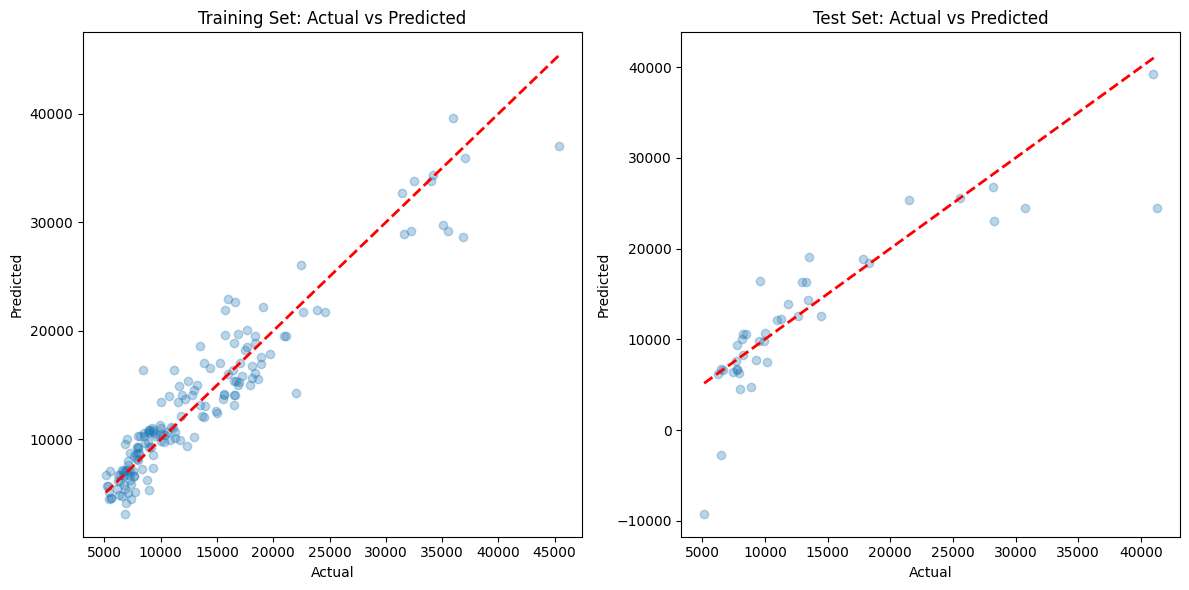

In [82]:
# Plot actual vs predicted for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')

# Plot actual vs predicted for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

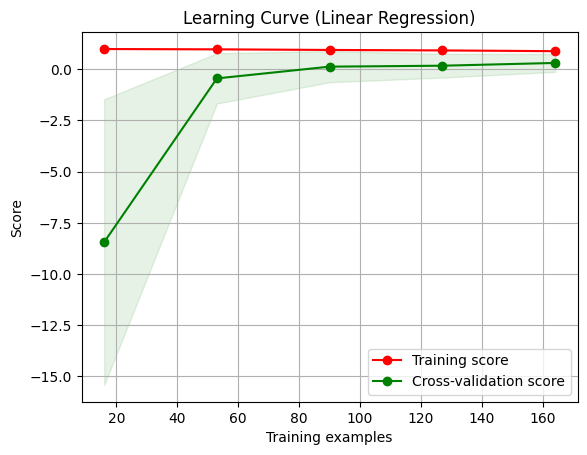

In [83]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(linear_model, "Learning Curve (Linear Regression)", X, y, cv=5, n_jobs=-1)
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\LENOVO\\.pyenv\\pyenv-win\\versions\\3.9.12\\lib\\site-packages\\matplotlib\\pyplot.py'>

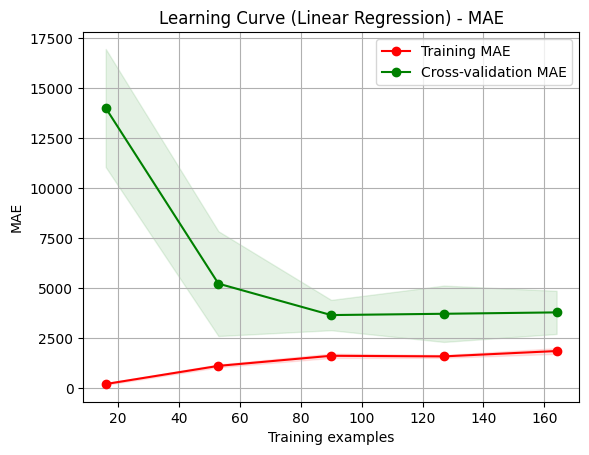

In [84]:
# Function to plot learning curve for MAE
def plot_learning_curve_mae(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MAE")
    
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=mae_scorer)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MAE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MAE")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve for MAE
plot_learning_curve_mae(linear_model, "Learning Curve (Linear Regression) - MAE", X, y, cv=5, n_jobs=-1)
# plt.show()


**Melakukan percobaan dengan model machine learning regression**

In [85]:
# List of regression models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Lasso Regression', ElasticNet()),
    ('Bayesian Ridge Regression', BayesianRidge()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Extra Tree Regression', ExtraTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('AdaBoost Regression', AdaBoostRegressor()),
    ('Bagging Regression', BaggingRegressor()),
    ('KNeighbors Regression', KNeighborsRegressor()),
    ('Support Vector Regression', SVR())
]

c:\Users\LENOVO\.pyenv\pyenv-win\versions\3.9.12\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.811e+08, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


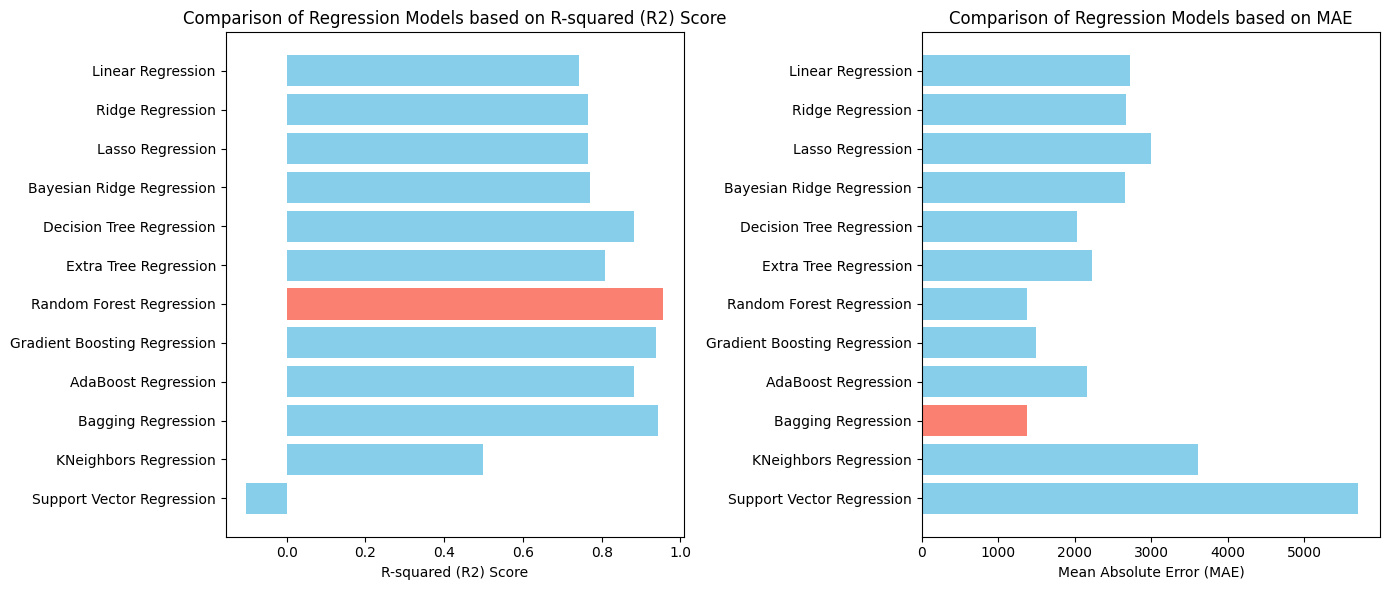

In [86]:
# Lists to store model names, R2 scores, and MAE values
model_names = []
r2_scores = []
mae_values = []

# Train and evaluate setiap model
for name, model in models:
    # Create pipeline with preprocessing and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append model name, R2 score, and MAE to the lists
    model_names.append(name)
    r2_scores.append(r2)
    mae_values.append(mae)

# Ambil index of the model with the lowest MAE and highest R2
lowest_mae_index = mae_values.index(min(mae_values))
highest_r2_index = r2_scores.index(max(r2_scores))

# Buat bar plot for R2 scores and MAE values
plt.figure(figsize=(14, 6))

# R2 Score Plot
plt.subplot(1, 2, 1)
r2_colors = ['skyblue'] * len(models)
r2_colors[highest_r2_index] = 'salmon'  
plt.barh(model_names, r2_scores, color=r2_colors)
plt.xlabel('R-squared (R2) Score')
plt.title('Comparison of Regression Models based on R-squared (R2) Score')
plt.gca().invert_yaxis() 

# MAE Plot
plt.subplot(1, 2, 2)
mae_colors = ['skyblue'] * len(models)
mae_colors[lowest_mae_index] = 'salmon' 
plt.barh(model_names, mae_values, color=mae_colors)
plt.xlabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regression Models based on MAE')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

In [87]:
for i in range(len(model_names)):
    print(f"{model_names[i]} : R^2={r2_scores[i]} : MAE={mae_values[i]}")
print()
print(f"Best model: {model_names[highest_r2_index]}")
print(f"Max score R2: {max(r2_scores)}")
print(f"Lowest MAE: {min(mae_values)}")

Linear Regression : R^2=0.7431481310314277 : MAE=2725.4876478439696
Ridge Regression : R^2=0.7651251869561815 : MAE=2666.6026869933794
Lasso Regression : R^2=0.7447540902549815 : MAE=2716.8140905331566
Lasso Regression : R^2=0.7645688356096279 : MAE=2998.895100135449
Bayesian Ridge Regression : R^2=0.7708110076043435 : MAE=2657.422202694003
Decision Tree Regression : R^2=0.881319206030658 : MAE=2024.3577154471543
Extra Tree Regression : R^2=0.809469798411621 : MAE=2219.796739837398
Random Forest Regression : R^2=0.9554313846269178 : MAE=1377.7207289972898
Gradient Boosting Regression : R^2=0.9385610574768966 : MAE=1487.107371195958
AdaBoost Regression : R^2=0.8827142954593781 : MAE=2166.5849022669695
Bagging Regression : R^2=0.9417330982297313 : MAE=1373.722552845529
KNeighbors Regression : R^2=0.49964884108194907 : MAE=3610.4300731707326
Support Vector Regression : R^2=-0.10242253735615425 : MAE=5708.751920393745

Best model: Random Forest Regression
Max score R2: 0.9554313846269178
L

In [88]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('estimator',RandomForestRegressor())
])

<module 'matplotlib.pyplot' from 'c:\\Users\\LENOVO\\.pyenv\\pyenv-win\\versions\\3.9.12\\lib\\site-packages\\matplotlib\\pyplot.py'>

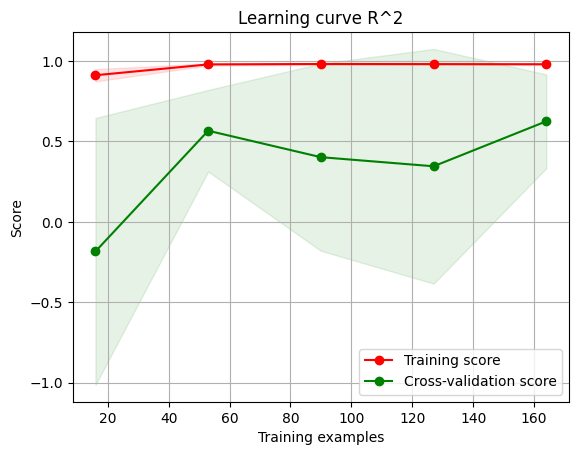

In [89]:
plot_learning_curve(pipeline,'Learning curve R^2',X,y,cv=5,n_jobs=-1)

<module 'matplotlib.pyplot' from 'c:\\Users\\LENOVO\\.pyenv\\pyenv-win\\versions\\3.9.12\\lib\\site-packages\\matplotlib\\pyplot.py'>

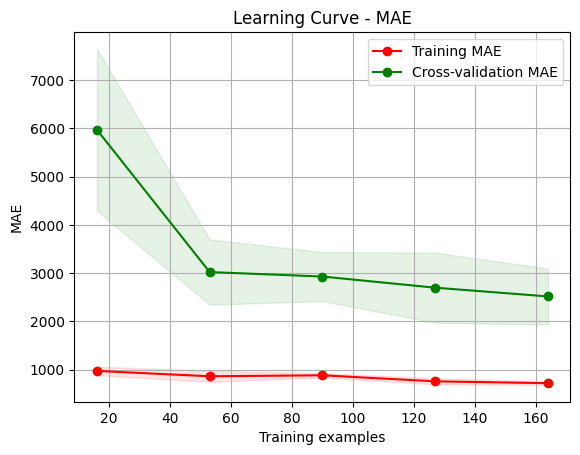

In [90]:
plot_learning_curve_mae(pipeline,"Learning Curve - MAE",X,y,cv=5,n_jobs=-1)

### HYPERPARAMETER TUNNING

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid_1={
    'model__n_estimators': [50, 100],
    
    'model__max_depth': [3, 4]
}

param_grid_2 = {
    'model__n_estimators': [100, 200, 300],
    
    'model__max_depth': [3, 4, 5]
}


#pipeline
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])

def perform_grid_search(param_grid, scenario):
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters ({scenario}):", grid_search.best_params_)
    print(f"Best R2 score ({scenario}):", grid_search.best_score_)

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Training performance untuk melihat hasil pada training phase
    y_train_pred = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Test performance untuk melihat hasil pada testing phase
    y_test_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Training R2 ({scenario}):", train_r2)
    print(f"Training MAE ({scenario}):", train_mae)
    print(f"Test R2 ({scenario}):", test_r2)
    print(f"Test MAE ({scenario}):", test_mae)
    print("\n")

# Perform grid search for each scenario
perform_grid_search(param_grid_1, "1")
perform_grid_search(param_grid_2, "2")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters (1): {'model__max_depth': 4, 'model__n_estimators': 50}
Best R2 score (1): 0.8649058536349216
Training R2 (1): 0.9526577823916844
Training MAE (1): 1227.9005573837455
Test R2 (1): 0.9378942859689551
Test MAE (1): 1668.8031136560767


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters (2): {'model__max_depth': 5, 'model__n_estimators': 100}
Best R2 score (2): 0.8763975743214507
Training R2 (2): 0.9660753763167903
Training MAE (2): 1025.936427029516
Test R2 (2): 0.9471020725097029
Test MAE (2): 1528.9900293161727




### Kesimpulan
Berdasarkan hasil hyperparameter tunning di dapatkan hasil yang lebih buruk dari pada sebelum dilakukan hyperparameter tunning

### SAVE MODEL

In [93]:
import joblib

In [94]:
path='../Model/FinalModel.pkl'

In [95]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])
pipeline.fit(X, y)
joblib.dump(pipeline,path)
print('model berhasil disimpan')

model berhasil disimpan


In [96]:
model=joblib.load('../Model/FinalModel.pkl')
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cleaning', Cleaning(),
                                                  ['horsepower', 'peakrpm',
                                                   'citympg',
                                                   'cylindernumber']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['symboling', 'horsepower',
                                                   'citympg', 'cylindernumber',
                                                   'wheelbase', 'boreratio']),
                                                 ('binary',
                                                  Pipeline(steps=[('Binary',
                                                                   BinaryEncoder())]),
   